In [254]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os
import dlib

### 1. Load image(CV), resize, convert to RGB

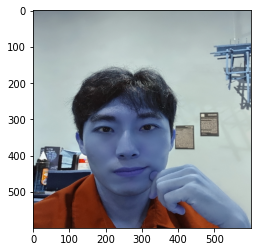

In [255]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (600, 600))    # 600x600의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

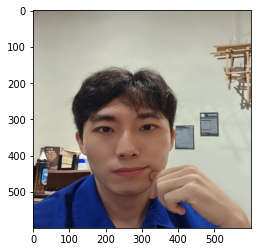

In [256]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [257]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

rectangles[[(142, 266) (365, 489)]]


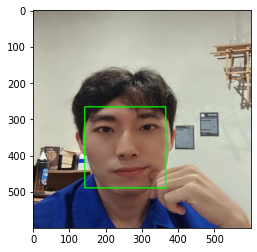

In [258]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [259]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [260]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_points))

68


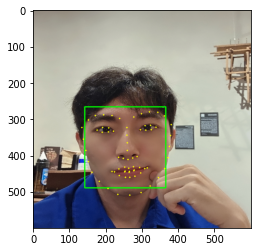

In [261]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [262]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(259, 386)
(x,y) : (259,386)
(w,h) : (224,224)


(224, 224, 3)


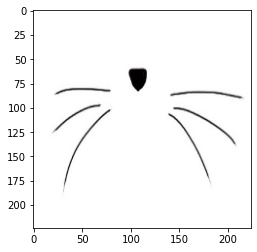

In [263]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers3.png'
img_sticker = cv2.imread(sticker_path)
#img_sticker = cv2.bitwise_not(img_sticker)
#img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

In [264]:
re_x = x - w // 2  # left
re_y = y - 100    # top까진 아니고 값 조정
print ('(x,y) : (%d,%d)'%(re_x, re_y))
print(img_sticker.shape)
sticker_area = img_show[re_y:re_y+img_sticker.shape[0],re_x:re_x+img_sticker.shape[1]]
print(sticker_area.shape)

(x,y) : (147,286)
(224, 224, 3)
(224, 224, 3)


In [265]:
sticker_area = img_show[re_y:re_y+img_sticker.shape[0],re_x:re_x+img_sticker.shape[1]]
img_show[re_y:re_y+img_sticker.shape[0],re_x:re_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

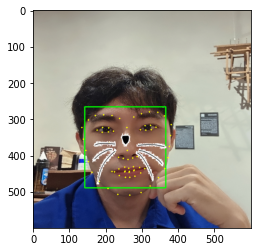

In [266]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

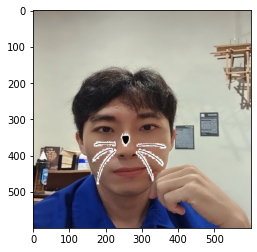

In [267]:
sticker_area = img_bgr[re_y:re_y +img_sticker.shape[0], re_x:re_x+img_sticker.shape[1]]
img_bgr[re_y:re_y + img_sticker.shape[0], re_x:re_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Hurdle
 np.where 함수 원리를 제대로 파악하지 않아 시간을 많이 소요하였다.
### 기타
2) 이미지에 따라 위치를 적절히 조정하였다. 